<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb" target="_blank">Understanding OLCI product structure >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT

<div class="alert alert-block alert-success">
<h3>Learn OLCI: Introductory</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
  - **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** if you are using or plan to use WEkEO.

There are no prerequisite notebooks for this module.
</div>
<hr>

# 1.1b Accessing OLCI data via the WEkEO HDA adaptor

### Data used

| Product Description  | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-------------:|:-----------------:|
| Sentinel-3 OLCI level-1B Full resolution | EO:EUM:DAT:SENTINEL-3:OL_1_EFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_1_EFR___" target="_blank">link</a> |
| Sentinel-3 OLCI level-2 full resolution  | EO:EUM:DAT:SENTINEL-3:OL_2_WFR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WFR___" target="_blank">link</a> |
| Sentinel-3 OLCI level-2 reduced resolution | EO:EUM:DAT:SENTINEL-3:OL_2_WRR___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3AOL_2_WRR___" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know;
* how to download data from WEkEO using the <font color="#138D75">**harmonised data access (hda)**</font> client

### Outline

Data from OLCI is available through multiple sources, either via a web user interface (WebUI) or through code and command line interfaces with an Application Programming Interface (API). WebUIs are useful for accessing quick-look data visualisations, and for browsing to see what is available. APIs are more useful for routine, automated and operational data access. Here we will guide you through ways you can access OLCI data through both methods.

Users should note that this notebook will use WEkEO [harmonised data access (HDA) API](#section3) to download <font color="#138D75">**all**</font> of the products required for the lessons in the OLCI introductory module. The HDA adaptor is the fastest and most suitable way of retrieving OLCI data when working inside the WEkEO infrastructure, either on the JupyterHub or on virtual machines.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Download data via GUIs](#section1)
 1. [The products we need](#section2)
 1. [Downloading via the WEkEO API](#section3)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import configparser # a library that allows us to parse standard configuration files
import IPython      # a library that helps us display video and HTML content
import os           # a library that allows us access to basic operating system commands like making directories
import json         # a library that helps us make JSON format files
import shutil       # a library that allows us access to basic operating system commands like copy
import zipfile      # a library that allows us to unzip zip-files.
import hda          # a library for downloading via wekeo

Sometimes we use configuration files to help us set some notebook parameters. The box below reads a configuration file to help us decide how large to make the videos displayed below.

In [2]:
# set defaults and overwrite with frameworks config if it exists
config = configparser.ConfigParser()
config["nbook"] = {"v_wd" : "700", "v_ht" : "450"}
if os.path.exists(os.path.join(os.path.dirname(os.getcwd()),"frameworks","config.ini")):
    config.read(os.path.join(os.path.dirname(os.getcwd()),"frameworks","config.ini"))

Next we will create a download directory to store the products we will download in this notebook.

In [3]:
# Create a download directory for our OLCI products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Downloading data via GUIs
[Back to top](#TOC_TOP)

</div>

<hr>

### WEkEO

WEkEO is the Copernicus Data Information and Access Service (DIAS) reference service for environmental data. It is a partnership between EUMETSAT, the European Centre for Medium-range Weather Forecasting (ECMWF), Mercator Ocean International, and the European Environment Agency (EEA). You can see an overview of the WEkEO service offering in the video below. WEkEO offers a harmonised data access (HDA) solution to a wide range of Copernicus data, including that from Sentinel-3 and associated down-stream products from the Copernicus Marine Service. The WEkEO HDA can be accessed via the <a href="https://www.wekeo.eu/data" target="_blank">WEkEO Data Viewer</a> and through an API, see [Downloading from WEkEO via the API](#section4).

You can visit the <a href="https://www.wekeo.eu/data" target="_blank">WEkEO Data Viewer</a> and explore the available marine data, however this notebook will also show you how to use the HDA API - see [Downloading from WEkEO via the API](#section4) below.

#### Links:
* <a href="https://www.wekeo.eu/data" target="_blank">WEkEO Data Viewer</a>
* <a href="https://www.wekeo.eu/docs" target="_blank">More information on WEkEO</a>

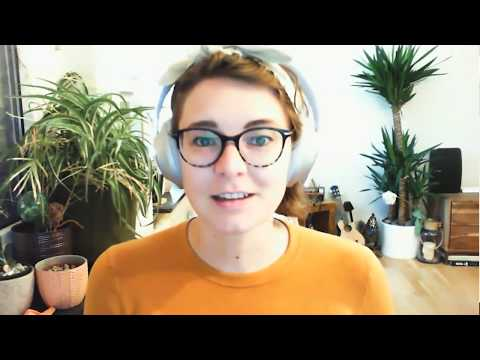

In [4]:
IPython.display.YouTubeVideo('UOexmq1LdyY', width=config["nbook"]["v_wd"], height=config["nbook"]["v_ht"])

<div class="alert alert-info" role="alert">

## 2. <a id='section2'></a>The products we need for this module
[Back to top](#TOC_TOP)
    
</div>

We need a number of OLCI level-1 and level-2 products for the notebooks within the introductory part of the learn-sral module. These products are shown below, and we will retrieve these products from the WEkEO product catalogue.
* S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3
* S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3
* S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3

<hr>
<div class="alert alert-info" role="alert">

## 3. <a id='section3'></a>Downloading from WEkEO via the API
[Back to top](#TOC_TOP)

</div>


Downloading from WEkEO harmonised data access (HDA) API is facilitated by another data access client. 
If you are currently working on the WEkEO JupyterHub, this client will already be installed. Otherwise, as with EUMDAC, if you have followed the installation guidelines in the yml file provided with this repository, you will also have the client installed. If not, you can find the source code <a href="https://github.com/ecmwf/hda" target="_blank">here</a>.

In order to allow us to download data using the WEkEO HDA API, we need to provide our credentials. To do this, we need to create a file called `.hdarc` in our home directory. For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system. In this file we need to add the following information exactly as follows;

```
url: https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker
user: <your_user_name>
password: <your_password>
```

You must replace `<your_user_name>` and `<your_password>` with the information from your WEkEO account (if you don't have one yet, register <a href="https://www.wekeo.eu/" target="_blank">here</a>. Once you have entered these credentials in the file, the `hda` client will automatically read in the credentials from the file when you use it.

To begin, we should establish an instance of the client.

In [6]:
c = hda.Client()

The WEkEO HDA client accepts requests as JSON queries. These have a specific format, which may look complex, but you can build on the examples you can find in the GUI, available under the **Show API request** button;

<img src='../img/WEkEO_show_api_OLCI.png' align='centre' width='75%'></img>


WEkEO allows you to search for data in time and space, but not by product name. However, we can work around this by providing the exact time stamps for our data. Below, we have a query for the first item in our product list, the OLCI level 1B product. You can see that the start and end times match the filename times, and the `producttype`, and `timeliness` correspond to those in the earlier specified filename too.

In [7]:
query = {
  "datasetId": "EO:EUM:DAT:SENTINEL-3:OL_1_EFR___",
  "dateRangeSelectValues": [
    {
      "name": "position",
      "start": "2021-07-17T10:10:15.000Z",
      "end": "2021-07-17T10:10:16.000Z"
    }
  ],
  "stringChoiceValues": [{"name": "producttype", "value": "OL_1_EFR___"},
                         {"name": "timeliness", "value": "NT"},
                         {"name": "relorbit", "value": "122"}
  ]
}

This next section of code prints the names of the files that have been found during the search...

In [8]:
matches = c.search(query)
for match in matches.results:
    fdst = match['filename']
    print(f"Found: {fdst}")

Found: S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3


We can see that we have found the file we are interested in, so the next section of code can be used to download it...

In [9]:
matches.download()

2022-09-29 21:45:46,198 INFO Downloading https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/QwSEuelSxIr9f4av4yv3UTGDLiQ to S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3 (592.3M)
2022-09-29 21:52:52,341 WARNING Oops, downloaded 635990063 byte(s), was supposed to be 621084000 (extra 14906063)                                                                                                                                             
2022-09-29 21:52:52,342 INFO Download rate 1.4M/s


Finally, we can unzip the file.

In [10]:
with zipfile.ZipFile(fdst, 'r') as zip_ref:
    zip_ref.extractall(download_dir)
    print(f'Unzipping of product {fdst} finished.')
os.remove(fdst)

Unzipping of product S3A_OL_1_EFR____20210717T101015_20210717T101315_20210718T145224_0179_074_122_1980_MAR_O_NT_002.SEN3 finished.


Now lets download our other two products. We will need to set up query files for both.

In [11]:
query_WRR = {
  "datasetId": "EO:EUM:DAT:SENTINEL-3:OL_2_WRR___",
  "dateRangeSelectValues": [{"name": "position", "start": "2021-07-17T09:57:32.000Z", "end": "2021-07-17T09:57:33.000Z"}],
  "stringChoiceValues": [{"name": "producttype", "value": "OL_2_WRR___"}, {"name": "timeliness", "value": "NT"}, {"name": "relorbit", "value": "122"}]
}

query_WFR = {
  "datasetId": "EO:EUM:DAT:SENTINEL-3:OL_2_WFR___",
  "dateRangeSelectValues": [{"name": "position", "start": "2021-07-17T10:10:15.000Z", "end": "2021-07-17T10:10:16.000Z"}],
  "stringChoiceValues": [{"name": "producttype", "value": "OL_2_WFR___"}, {"name": "timeliness", "value": "NT"}, {"name": "relorbit", "value": "122"}]
}

queries = [query_WRR, query_WFR]

And again we can search for, and download the results...

In [12]:
for query in queries:
    matches = c.search(query)
    matches.download()
    for match in matches.results:
        fdst = match['filename']
        print(f"Found: {fdst}")        
        with zipfile.ZipFile(fdst, 'r') as zip_ref:
            zip_ref.extractall(download_dir)
            print(f'Unzipping of product {fdst} finished.')
        os.remove(fdst)

2022-09-29 21:53:08,463 INFO Downloading https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/zLpGFCWzsXUIILI9BM4TMPrtOEk to S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3 (332.1M)
2022-09-29 21:57:39,609 WARNING Oops, downloaded 356600877 byte(s), was supposed to be 348243000 (extra 8357877)                                                                                                                                              
2022-09-29 21:57:39,610 INFO Download rate 1.2M/s


Found: S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3
Unzipping of product S3A_OL_2_WRR____20210717T095732_20210717T104152_20210718T152419_2660_074_122______MAR_O_NT_003.SEN3 finished.


2022-09-29 21:57:50,959 INFO Downloading https://wekeo-broker.apps.mercator.dpi.wekeo.eu/databroker/dataorder/download/At6rTrLyn6YnQebpEN_vkaxJ9dM to S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3 (328M)
2022-09-29 22:02:02,031 WARNING Oops, downloaded 352168068 byte(s), was supposed to be 343914000 (extra 8254068)                                                                                                                                              
2022-09-29 22:02:02,032 INFO Download rate 1.3M/s


Found: S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3
Unzipping of product S3A_OL_2_WFR____20210717T101015_20210717T101315_20210718T221347_0179_074_122_1980_MAR_O_NT_003.SEN3 finished.


You can now continue to work through the rest of the notebooks in this repository and learn more about working with OLCI data.

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./1_2_OLCI_file_structure.ipynb" target="_blank">Understanding OLCI product structure >></a>
<hr>

<a href="https://gitlab.eumetsat.int/eumetlab/ocean" target="_blank">View on GitLab</a> | <a href="https://training.eumetsat.int/" target="_blank">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int target="_blank">Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int target="_blank">Contact our training team to collaborate on and reuse this material</a></span></p>